# Import all the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,accuracy_score
import warnings
warnings.filterwarnings("ignore")

load the data set

In [2]:
ds=pd.read_csv("sales.csv")

In [3]:
ds.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df=pd.DataFrame(ds)

In [5]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


# Checking data types of data

In [7]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

independent variables and target variable  are float type

In [8]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

data set have no missing values

In [9]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [10]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


dropped unneccesary column

In [11]:
df.shape

(200, 4)

we have 200 rows and 4 columns

In [12]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:>

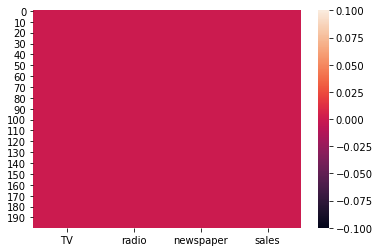

In [13]:
sns.heatmap(df.isnull())

heatmap shows that there is no missing values

In [14]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

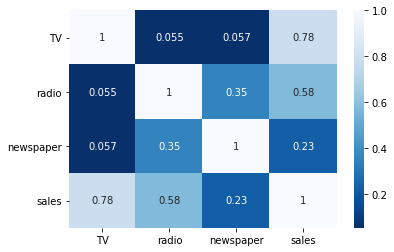

In [15]:
sns.heatmap(df.corr(),annot=True,cmap='Blues_r')

shows the correlation between independent variables and target variables

# visualize the data

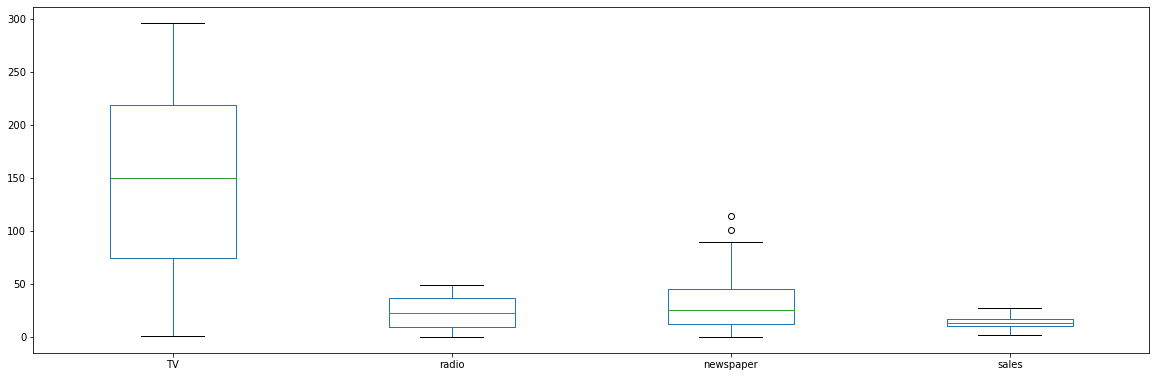

In [16]:
df.plot(kind='box',figsize=(20,10))
plt.subplots_adjust(bottom=0.40)
plt.show()

newspaper column have outliers

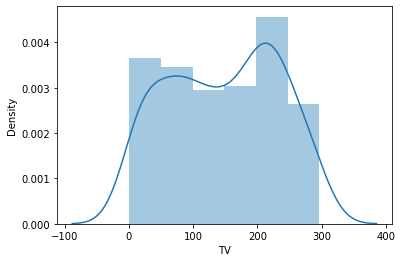

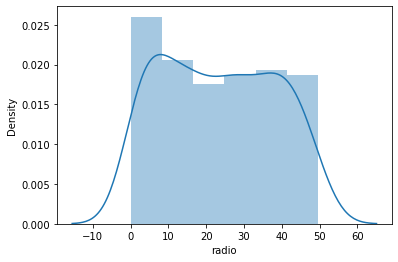

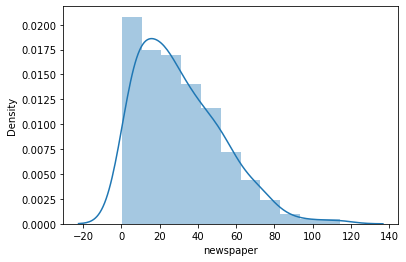

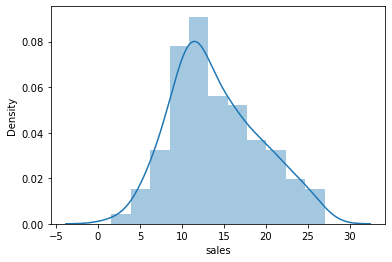

<Figure size 432x288 with 0 Axes>

In [17]:
for i in df.columns:
    sns.distplot(df[i])
    plt.figure()

newspaper column have some skewness

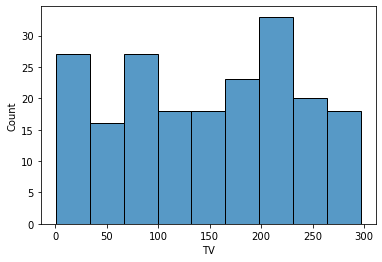

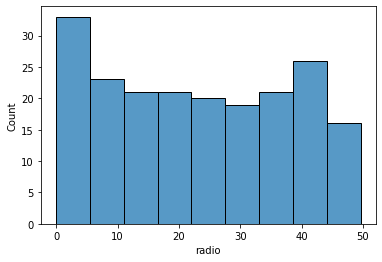

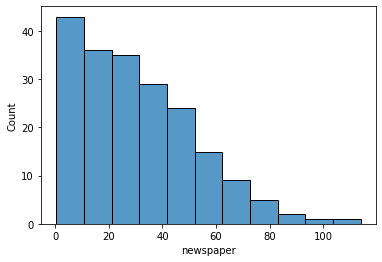

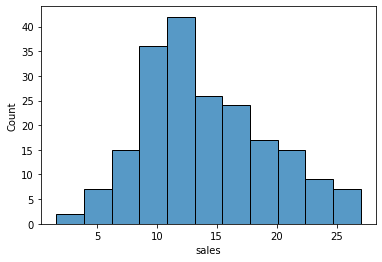

<Figure size 432x288 with 0 Axes>

In [18]:
for i in df.columns:
    sns.histplot(df[i])
    plt.figure()

<AxesSubplot:xlabel='sales', ylabel='newspaper'>

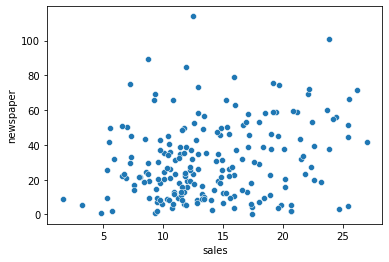

In [19]:
sns.scatterplot(df['sales'],df['newspaper'])

<AxesSubplot:xlabel='sales', ylabel='radio'>

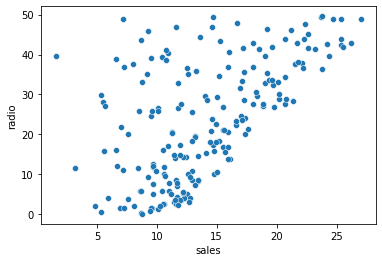

In [20]:
sns.scatterplot(df['sales'],df['radio'])

<AxesSubplot:xlabel='sales', ylabel='TV'>

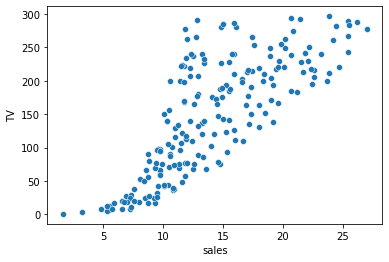

In [21]:
sns.scatterplot(df['sales'],df['TV'])

above scatterplot shows that sales increses more in TV channel

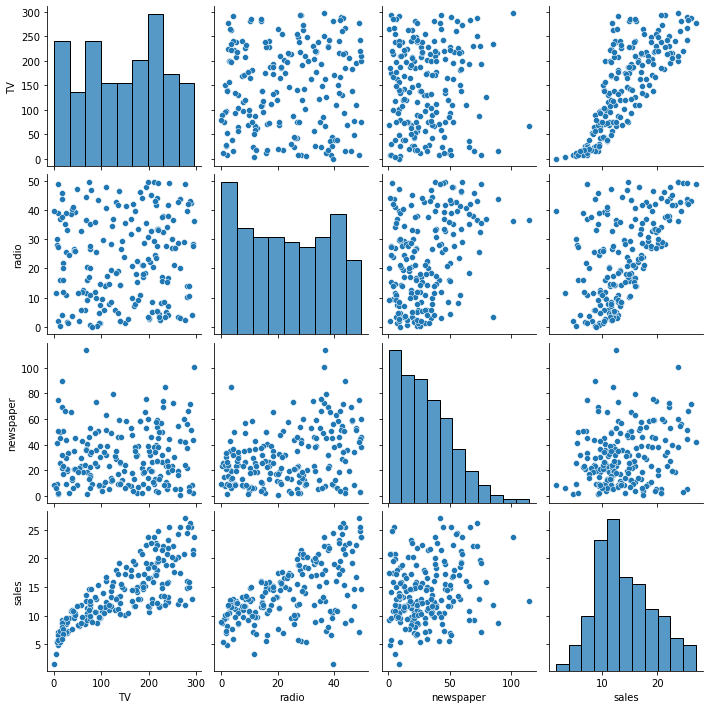

In [22]:
sns.pairplot(df)

In [23]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

only newspaper data have little skewness

In [24]:
from scipy.stats import zscore 

In [25]:
z=np.abs(zscore(df))

In [26]:
z

array([[9.69852266e-01, 9.81522472e-01, 1.77894547e+00, 1.55205313e+00],
       [1.19737623e+00, 1.08280781e+00, 6.69578760e-01, 6.96046111e-01],
       [1.51615499e+00, 1.52846331e+00, 1.78354865e+00, 9.07405869e-01],
       [5.20496822e-02, 1.21785493e+00, 1.28640506e+00, 8.60330287e-01],
       [3.94182198e-01, 8.41613655e-01, 1.28180188e+00, 2.15683025e-01],
       [1.61540845e+00, 1.73103399e+00, 2.04592999e+00, 1.31091086e+00],
       [1.04557682e+00, 6.43904671e-01, 3.24708413e-01, 4.27042783e-01],
       [3.13436589e-01, 2.47406325e-01, 8.72486994e-01, 1.58039455e-01],
       [1.61657614e+00, 1.42906863e+00, 1.36042422e+00, 1.77205942e+00],
       [6.16042873e-01, 1.39530685e+00, 4.30581584e-01, 6.57617064e-01],
       [9.45155670e-01, 1.17923146e+00, 2.92486143e-01, 1.04190753e+00],
       [7.90028350e-01, 4.96973404e-02, 1.22232878e+00, 6.48970529e-01],
       [1.43908760e+00, 7.99208859e-01, 1.62704048e+00, 9.26620392e-01],
       [5.78501712e-01, 1.05768905e+00, 1.07502697e

In [27]:
threshold=3
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


In [28]:
df1=df[(z<3).all(axis=1)]

In [29]:
df1.shape

(198, 4)

In [30]:
df.shape

(200, 4)

removed outliers present in the data

In [31]:
df1.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

as we removed outliers skewness present n newspaper data also got reduced

In [32]:
x=df1.iloc[:,:-1]

In [33]:
x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [34]:
y=df1.iloc[:,-1]

In [35]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 198, dtype: float64

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

In [37]:
x_train.shape

(148, 3)

In [38]:
y_train.shape

(148,)

In [39]:
x_test.shape

(50, 3)

In [40]:
y_test.shape

(50,)

Divide the data for training and testing

In [41]:
le=LinearRegression()

In [42]:
le.fit(x_train,y_train)
pred=le.predict(x_test)

used Linearregression model to fit and predict data

In [43]:
print('Predicted values:',pred)
print('actual values:',y_test)

Predicted values: [ 8.82290426 11.99404595 23.24778757  9.01656412 10.73423275 21.59566353
 19.17174836 11.56398326 14.01461825 17.47252564 14.21787    20.89361395
  8.89129736 12.63866464  6.633081    9.14030126 10.99478302 12.48101233
  9.85695697 11.50053326 13.27849821 16.92635269 22.91172162  6.25458418
 16.97916635 20.81888944  8.34849324 14.9646917   6.98084301 12.30018944
 17.76573789 13.60775961  6.58385423 14.49375646 15.40438234 17.96934561
 15.1813038  11.80870562 18.27584621 16.06026726 19.08858763 13.16365279
 11.83902037  9.42339259  6.41229174  7.66803884 17.05978143 16.05357545
 11.20335949 22.72669955]
actual values: 66      9.5
116    12.2
17     24.4
143    10.4
158     7.3
128    24.7
142    20.1
31     11.9
19     14.6
169    15.0
160    14.4
15     22.4
56      5.5
57     13.2
117     9.4
46     10.6
126     6.6
9      10.6
149    10.1
86     12.0
115    12.6
163    18.0
61     24.2
189     6.7
74     17.0
69     22.3
121     7.0
165    11.9
119     6.6
177    11

In [44]:
print(r2_score(y_test,pred))

0.8798818054597369


In [45]:
print(mean_squared_error(y_test,pred))

3.454680474877475


In [46]:
print(np.sqrt(mean_squared_error(y_test,pred)))

1.8586770765459704


In [47]:
print(mean_absolute_error(y_test,pred))

1.3700158302961691


above values shows the accuracy scores

In [48]:
print(le.coef_)

[0.04407734 0.1818952  0.01271509]


values of coeffient

In [49]:
print(le.intercept_)

2.931872973772787


value of intercept

In [50]:
import joblib

In [51]:
joblib.dump(le,'Sales.obj')

['Sales.obj']